##Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor

#Read the Dataset

In [2]:
df = pd.read_csv('garments_worker_productivity.csv')

In [3]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


#Data Preparation

2.1: Handling Missing Values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [5]:
df.isna().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [10]:
df['unfinished_items'] = df['unfinished_items'].fillna(df['unfinished_items'].mean())

2.2: Handling Independent Columns

In [8]:
df.drop(['date','targeted_productivity'], axis =1, inplace =True)
df.head()

,quarter,department,day,team,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,Thursday,8,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,Thursday,1,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,Quarter1,sweing,Thursday,11,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,Quarter1,sweing,Thursday,12,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,Quarter1,sweing,Thursday,6,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [9]:
df = df.rename(columns ={
    'team' : 'team_number',
    'smv'  : 'time_allocated',
    'wip'  : 'unfinished_items',
    'no_of_style_change' : 'style_change'
})

In [11]:
df['quarter'].unique()

array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
      dtype=object)

In [12]:
df['quarter'] = df['quarter'].str.replace('Quarter5','Quarter1')

In [13]:
df['quarter'] = df['quarter'].str.extract(r'(\d+)')
df['quarter']

0       1
1       1
2       1
3       1
4       1
       ..
1192    2
1193    2
1194    2
1195    2
1196    2
Name: quarter, Length: 1197, dtype: object

In [14]:
df['department'] = df['department'].str.replace('sweing','sewing')
df['department'] = df['department'].str.replace('finishing ', 'finishing')

In [15]:
df['team_number'] =df['team_number'].astype(int)
df['over_time'] =df['over_time'].astype(int)
df['incentive'] =df['incentive'].astype(int)
df['idle_time'] =df['idle_time'].astype(int)
df['style_change'] =df['style_change'].astype(int)
df['time_allocated'] =df['time_allocated'].astype(int)
df['unfinished_items'] =df['unfinished_items'].astype(int)
df['idle_time'] =df['idle_time'].astype(int)
df['no_of_workers'] =df['no_of_workers'].astype(int)
df['quarter'] =df['quarter'].astype(int)

2.3: Handling Categorical Values

In [16]:
lc = LabelEncoder()

In [17]:
print('Before encoding: ', df['department'].unique())
df['department'] = lc.fit_transform(df['department'])
print('After encoding: ',df['department'].unique())

Before encoding:  ['sewing' 'finishing']
After encoding:  [1 0]


In [18]:
print('Before encoding: ', df['day'].unique())
df['day'] = lc.fit_transform(df['day'])
print('After encoding: ',df['day'].unique())

Before encoding:  ['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']
After encoding:  [3 1 2 0 4 5]


##Exploratory Data Analysis

1. Descriptive statistical

In [19]:
df.describe(include='all')

,quarter,department,day,team_number,time_allocated,unfinished_items,over_time,incentive,idle_time,idle_men,style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,2.252297,0.577277,2.534670,6.426901,14.508772,1190.269006,4567.460317,38.210526,0.727652,0.369256,0.150376,34.551378,0.735091
std,1.130974,0.494199,1.714538,3.463963,11.067638,1395.647280,3348.823563,160.182643,12.709094,3.268987,0.427848,22.152559,0.174488
min,1.000000,0.000000,0.000000,1.000000,2.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,1.000000,0.000000,1.000000,3.000000,3.000000,970.000000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,2.000000,1.000000,3.000000,6.000000,15.000000,1190.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,3.000000,1.000000,4.000000,9.000000,24.000000,1190.000000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,4.000000,1.000000,5.000000,12.000000,54.000000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


2.1 Univariate Analysis

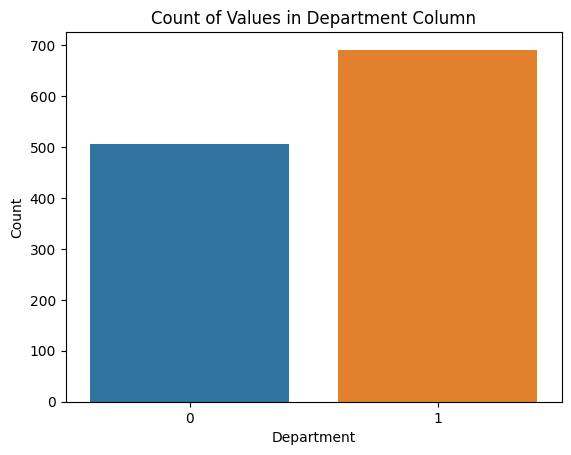

In [20]:
sns.countplot(data=df, x='department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Count of Values in Department Column')
plt.show()

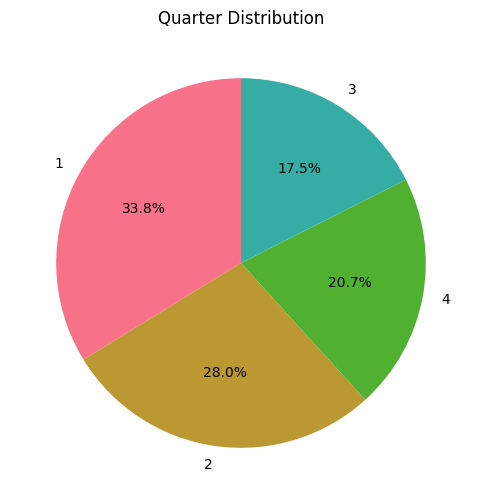

In [21]:
quarter_counts = df['quarter'].value_counts()
plt.figure(figsize=(8,6))
sns.set_palette("husl")
plt.pie(quarter_counts, labels=quarter_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Quarter Distribution')
plt.show()

2.2 Bivariate Analysis

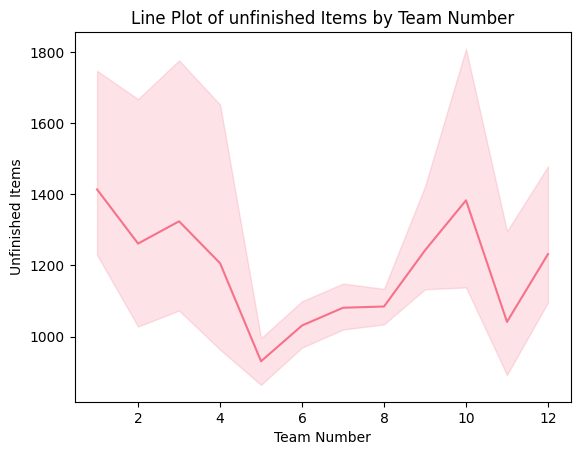

In [22]:
sns.lineplot(data=df, x='team_number' , y='unfinished_items')
plt.xlabel('Team Number')
plt.ylabel('Unfinished Items')
plt.title('Line Plot of unfinished Items by Team Number')
plt.show()

2.3 Multivariate analysis

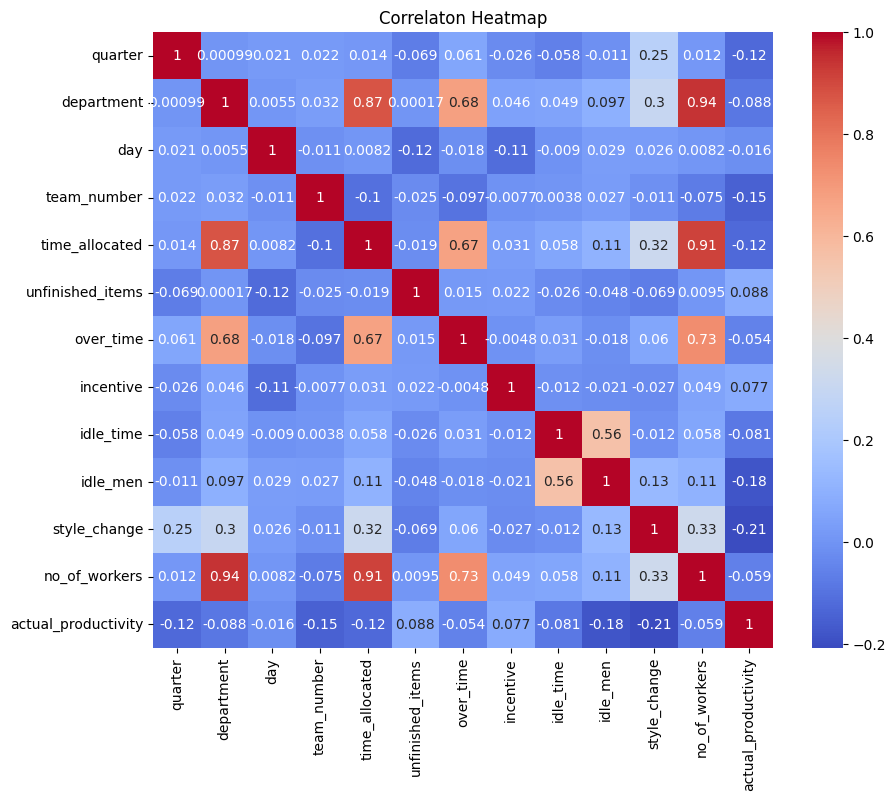

In [23]:
#Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlaton Heatmap')
plt.show()

Splitting data into train and test

In [24]:
X = df.drop(['actual_productivity'],axis=1)
X

,quarter,department,day,team_number,time_allocated,unfinished_items,over_time,incentive,idle_time,idle_men,style_change,no_of_workers
0,1,1,3,8,26,1108,7080,98,0,0,0,59
1,1,0,3,1,3,1190,960,0,0,0,0,8
2,1,1,3,11,11,968,3660,50,0,0,0,30
3,1,1,3,12,11,968,3660,50,0,0,0,30
4,1,1,3,6,25,1170,1920,50,0,0,0,56
...,...,...,...,...,...,...,...,...,...,...,...,...
1192,2,0,5,10,2,1190,960,0,0,0,0,8
1193,2,0,5,8,3,1190,960,0,0,0,0,8
1194,2,0,5,7,3,1190,960,0,0,0,0,8
1195,2,0,5,9,2,1190,1800,0,0,0,0,15


In [25]:
y=df['actual_productivity']
y

0       0.940725
1       0.886500
2       0.800570
3       0.800570
4       0.800382
          ...   
1192    0.628333
1193    0.625625
1194    0.625625
1195    0.505889
1196    0.394722
Name: actual_productivity, Length: 1197, dtype: float64

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state= 25)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(957, 12)
(240, 12)
(957,)
(240,)


In [27]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled

array([[-1.10773621,  0.85572897,  0.27151595, ..., -0.11300466,
        -0.3516175 ,  1.10410904],
       [-1.10773621, -1.1685943 ,  0.27151595, ..., -0.11300466,
        -0.3516175 , -1.19907034],
       [-1.10773621,  0.85572897,  0.27151595, ..., -0.11300466,
        -0.3516175 , -0.20554198],
       ...,
       [-0.22317301, -1.1685943 ,  1.43849833, ..., -0.11300466,
        -0.3516175 , -1.19907034],
       [-0.22317301, -1.1685943 ,  1.43849833, ..., -0.11300466,
        -0.3516175 , -0.88294768],
       [-0.22317301, -1.1685943 ,  1.43849833, ..., -0.11300466,
        -0.3516175 , -1.2893911 ]])

In [28]:
X_scaled = pd.DataFrame(X_scaled)
X_scaled


,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.107736,0.855729,0.271516,0.454323,1.038707,-0.058971,0.750589,0.373414,-0.057278,-0.113005,-0.351617,1.104109
1,-1.107736,-1.168594,0.271516,-1.567329,-1.040293,-0.000193,-1.077682,-0.238643,-0.057278,-0.113005,-0.351617,-1.199070
2,-1.107736,0.855729,0.271516,1.320745,-0.317162,-0.159325,-0.271092,0.073631,-0.057278,-0.113005,-0.351617,-0.205542
3,-1.107736,0.855729,0.271516,1.609552,-0.317162,-0.159325,-0.271092,0.073631,-0.057278,-0.113005,-0.351617,-0.205542
4,-1.107736,0.855729,0.271516,-0.123292,0.948316,-0.014529,-0.790895,0.073631,-0.057278,-0.113005,-0.351617,0.968628
...,...,...,...,...,...,...,...,...,...,...,...,...
1192,-0.223173,-1.168594,1.438498,1.031937,-1.130684,-0.000193,-1.077682,-0.238643,-0.057278,-0.113005,-0.351617,-1.199070
1193,-0.223173,-1.168594,1.438498,0.454323,-1.040293,-0.000193,-1.077682,-0.238643,-0.057278,-0.113005,-0.351617,-1.199070
1194,-0.223173,-1.168594,1.438498,0.165515,-1.040293,-0.000193,-1.077682,-0.238643,-0.057278,-0.113005,-0.351617,-1.199070
1195,-0.223173,-1.168594,1.438498,0.743130,-1.130684,-0.000193,-0.826743,-0.238643,-0.057278,-0.113005,-0.351617,-0.882948


##Model Building

Linear Regression Model

In [29]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

Decision Tree Regressor Model

In [30]:
dtr = DecisionTreeRegressor(max_depth= 4, min_samples_split =3, min_samples_leaf= 2)
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=2, min_samples_split=3)

Random Forest Regressor Model

In [31]:
rfr = RandomForestRegressor(n_estimators = 100,
                            max_depth = 6,
                            min_weight_fraction_leaf = 0.05,
                            max_features = 0.8,
                            random_state= 42)

rfr.fit(X_train,y_train)

RandomForestRegressor(max_depth=6, max_features=0.8,
                      min_weight_fraction_leaf=0.05, random_state=42)

Gradient Boosting Regressor Model

In [32]:
gbr = GradientBoostingRegressor(n_estimators = 100, learning_rate=0.1, max_depth=1, random_state=42)
gbr.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=1, random_state=42)

Extreme Gradient Boost Regressor Model

In [33]:
xgb = XGBRegressor(n_estimators= 300, learning_rate=0.05, max_leaves = 3, random_state= 1, enable_categorical = True)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=3,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=1, ...)

Bagging Regressor Model

In [34]:
# Define base model
base_model = XGBRegressor(n_estimators=700, learning_rate=0.06, max_depth=2, max_leaves=3, random_state=1)

# Create bagging regressor
bagging_reg = BaggingRegressor(base_model, n_estimators=100, random_state=42)

# Fit bagging regressor
bagging_reg.fit(X_train, y_train)

BaggingRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                        callbacks=None, colsample_bylevel=None,
                                        colsample_bynode=None,
                                        colsample_bytree=None, device=None,
                                        early_stopping_rounds=None,
                                        enable_categorical=False,
                                        eval_metric=None, feature_types=None,
                                        gamma=None, grow_policy=None,
                                        importance_type=None,
                                        interaction_constraints=None,
                                        learning_rate=0.06, max_bin=None,
                                        max_cat_threshold=None,
                                        max_cat_to_onehot=None,
                                        max_delta_step=None, max_depth=2,
                                        max_leaves=3, min_child_weight=None,
                                        missing=nan, monotone_constraints=None,
                                        multi_strategy=None, n_estimators=700,
                                        n_jobs=None, num_parallel_tree=None,
                                        random_state=1, ...),
                 n_estimators=100, random_state=42)

Boosting Regressor Model

In [35]:

# Define base model
base_model = XGBRegressor(n_estimators=700, learning_rate=0.06, max_depth=2, max_leaves=3, random_state=1)

# Create AdaBoost regressor
boosting_reg = AdaBoostRegressor(base_model, n_estimators=100, learning_rate=0.1, random_state=42)

# Fit AdaBoost regressor
boosting_reg.fit(X_train, y_train)

AdaBoostRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                         callbacks=None, colsample_bylevel=None,
                                         colsample_bynode=None,
                                         colsample_bytree=None, device=None,
                                         early_stopping_rounds=None,
                                         enable_categorical=False,
                                         eval_metric=None, feature_types=None,
                                         gamma=None, grow_policy=None,
                                         importance_type=None,
                                         interaction_constraints=None,
                                         learning_rate=0.06, max_bin=None,
                                         max_cat_threshold=None,
                                         max_cat_to_onehot=None,
                                         max_delta_step=None, max_depth=2,
                                         max_leaves=3, min_child_weight=None,
                                         missing=nan, monotone_constraints=None,
                                         multi_strategy=None, n_estimators=700,
                                         n_jobs=None, num_parallel_tree=None,
                                         random_state=1, ...),
                  learning_rate=0.1, n_estimators=100, random_state=42)

##Performance Testing

Linear Regression Model


In [36]:
#training score
predict_train = lr.predict(X_train)
mse = mean_squared_error(y_train, predict_train)
rmse_lr_train = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_lr_train)

Root Mean Squared Error: 0.16226529653729893


In [37]:
#testing score
predict_test = lr.predict(X_test)
mse = mean_squared_error(y_test, predict_test)
rmse_lr_test = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_lr_test)

Root Mean Squared Error: 0.16116562949494248


Decision Tree Regressor Model

In [38]:
#training score
predict_train_dtr = dtr.predict(X_train)
mse = mean_squared_error(y_train, predict_train_dtr)
rmse_dtr_train = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_dtr_train)

Root Mean Squared Error: 0.13187559206436333


In [39]:
#testing score
predict_test_dtr = dtr.predict(X_test)
mse = mean_squared_error(y_test, predict_test_dtr)
rmse_dtr_test = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_dtr_test)

Root Mean Squared Error: 0.12918875831022705


Random Forest Regressor Model

In [40]:
#training score
predict_train_rfr = rfr.predict(X_train)
mse = mean_squared_error(y_train, predict_train_rfr)
rmse_rfr_train = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_rfr_train)

Root Mean Squared Error: 0.13066329578222882


In [41]:
#testing score
predict_test_rfr = rfr.predict(X_test)
mse = mean_squared_error(y_test, predict_test_rfr)
rmse_rfr_test = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_rfr_test)

Root Mean Squared Error: 0.12721255996349562


Gradient Boosting Regressor Model

In [42]:
#training score
predict_train_gbr = gbr.predict(X_train)
mse = mean_squared_error(y_train, predict_train_gbr)
rmse_gbr_train = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_gbr_train)

Root Mean Squared Error: 0.14244277376076936


In [43]:
#testing score
predict_test_gbr = gbr.predict(X_test)
mse = mean_squared_error(y_test, predict_test_gbr)
rmse_gbr_test = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_gbr_test)

Root Mean Squared Error: 0.1394815884261522


Extreme Gradient Boosting Regressor Model

In [44]:
#training score
predict_train_xgb = xgb.predict(X_train)
mse = mean_squared_error(y_train, predict_train_xgb)
rmse_xgb_train = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_xgb_train)
# 0.0575744...

Root Mean Squared Error: 0.12332111620483295


In [45]:
#testing score
predict_test_xgb = xgb.predict(X_test)
mse = mean_squared_error(y_test, predict_test_xgb)
rmse_xgb_test = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_xgb_test)

Root Mean Squared Error: 0.12067259780052846


Bagging Regressor Model

In [46]:
#Evaluate performance
y_train_pred = bagging_reg.predict(X_train)
y_test_pred = bagging_reg.predict(X_test)
train_rmse_b = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse_b = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("Bagging regressor:")
print(f"Training RMSE: {train_rmse_b}")
print(f"Testing RMSE: {test_rmse_b}")

Bagging regressor:
Training RMSE: 0.11535605467787764
Testing RMSE: 0.11702569725241972


Boosting Regressor Model

In [47]:
#Evaluate performance
y_train_pred = boosting_reg.predict(X_train)
y_test_pred = boosting_reg.predict(X_test)
train_rmse_bo = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse_bo = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("AdaBoost Regressor:")
print(f"Training RMSE: {train_rmse_bo}")
print(f"Testing RMSE: {test_rmse_bo}")

AdaBoost Regressor:
Training RMSE: 0.11490519154013097
Testing RMSE: 0.12615829946650983


Comparing Models

In [48]:
results = pd.DataFrame(columns=['Model','Training RMSE','Testing RMSE'])
results.loc[0] = ['Linear Regressor',rmse_lr_train,rmse_lr_test]
results.loc[1] = ['Decison Tree Regressor',rmse_dtr_train,rmse_dtr_test]
results.loc[2] = ['Random Forest Regressor',rmse_rfr_train,rmse_rfr_test]
results.loc[3] = ['Gradient Regressor',rmse_gbr_train,rmse_gbr_test]
results.loc[4] = ['XG Boost Regressor',rmse_xgb_train,rmse_xgb_test]
results.loc[5] = ['Bagging Regressor',train_rmse_b,test_rmse_b]
results.loc[6] = ['Boosting Regressor',train_rmse_bo,test_rmse_bo]
print(results)

                     Model  Training RMSE  Testing RMSE
0         Linear Regressor       0.162265      0.161166
1   Decison Tree Regressor       0.131876      0.129189
2  Random Forest Regressor       0.130663      0.127213
3       Gradient Regressor       0.142443      0.139482
4       XG Boost Regressor       0.123321      0.120673
5        Bagging Regressor       0.115356      0.117026
6       Boosting Regressor       0.114905      0.126158


In [54]:
lr.predict([[1,5,5,4,8,7,9,4,5,2,7,4]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-0.06100119])

##Model Deployment

Save the best model

In [55]:
pickle.dump(boosting_reg,open('productivity.pkl','wb'))